In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from stim_surface_code.stability import StabilityPatch
from stim_surface_code import noise

# Basic usage

In [2]:
s = StabilityPatch(6, 6, 6, 'Z')
s

------------------------------------------------------------------
|    |    |X 36|    |    |    |X 37|    |    |    |X 38|    |    |
----------+----+--------------+----+--------------+----+----------
|    |   0|    |   1|    |   2|    |   3|    |   4|    |   5|    |
-----+----+----+----+----+----+----+----+----+----+----+----+-----
|X 39|    |Z 40|    |X 41|    |Z 42|    |X 43|    |Z 44|    |X 45|
-----+----+----+----+----+----+----+----+----+----+----+----+-----
|    |   6|    |   7|    |   8|    |   9|    |  10|    |  11|    |
----------+----+----+----+----+----+----+----+----+----+----------
|    |    |X 46|    |Z 47|    |X 48|    |Z 49|    |X 50|    |    |
----------+----+----+----+----+----+----+----+----+----+----------
|    |  12|    |  13|    |  14|    |  15|    |  16|    |  17|    |
-----+----+----+----+----+----+----+----+----+----+----+----+-----
|X 51|    |Z 52|    |X 53|    |Z 54|    |X 55|    |Z 56|    |X 57|
-----+----+----+----+----+----+----+----+----+----+----+----+-

In [3]:
# 10x better noise vals than Google's device
noise_params = noise.GoogleNoiseParams.improve(10)

print(noise_params.baseline_error_means)

{'T1': 0.0002, 'T2': 0.00030000000000000003, 'gate1_err': 8e-05, 'gate2_err': 0.0005, 'readout_err': 0.0002}


In [4]:
s.set_error_vals_normal(noise_params.baseline_error_means, noise_params.baseline_error_stdevs)

In [5]:
s.count_logical_errors()

(3.1e-06, 10000000)

# Increasing d

In [6]:
def get_noise_params(p):
    return noise.NoiseParams(
        {
            'T1':np.inf, 
            'T2':np.inf, 
            'gate1_err':p, 
            'gate2_err':p, 
            'readout_err':p,
        },
    )

In [7]:
# see how to do this more efficiently in notebook 03_sinter.ipynb!
ds = [4,6,8]
ps = np.geomspace(1e-2,1e-3,5)
z_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = StabilityPatch(d, d, d, observable_basis='Z')
        m.set_error_vals_normal(get_noise_params(p).baseline_error_means)
        ler = m.count_logical_errors(shots=10**6)[0]
        z_vals[i,j] = ler

In [8]:
ds = [4,6,8]
ps = np.geomspace(1e-2,1e-3,5)
x_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = StabilityPatch(d, d, d, observable_basis='X')
        m.set_error_vals_normal(get_noise_params(p).baseline_error_means)
        ler = m.count_logical_errors(shots=10**6)[0]
        x_vals[i,j] = ler

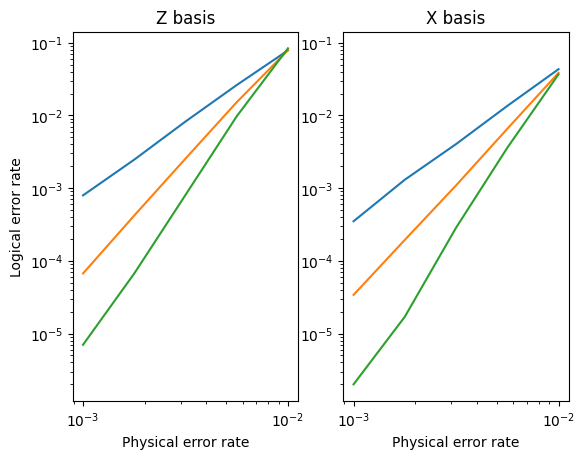

In [9]:
ax1 = plt.subplot(121)
ax1.plot(ps, z_vals.T)
ax1.loglog()
ax1.set_ylabel('Logical error rate')
ax1.set_title('Z basis')
ax1.set_xlabel('Physical error rate')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(ps, x_vals.T)
ax2.loglog()
ax2.set_title('X basis')
ax2.set_xlabel('Physical error rate')

plt.show()